In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import datetime
import scipy.io
import scipy.signal
import numpy as np
import netCDF4 as nc
import cartopy.feature
import cartopy.crs as ccrs # ccrs
#import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [36]:
u_names = sorted(glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/u10*monmean*nc'))
v_names = sorted(glob.glob('/ocean/yingkai/GEOTRACES/FORCING/ANHA4/GDPS/v10*monmean*nc'))

In [44]:
u_obj = nc.Dataset(u_names[0])
x = u_obj.variables['LON'][:]
y = u_obj.variables['LAT'][:]
lon, lat = np.meshgrid(x, y)

In [45]:
my_x = np.linspace(0, 360, 180)
my_y = np.linspace(60, 90, 15)
mylon, mylat = np.meshgrid(my_x, my_y)

In [29]:
mylon.shape

(15, 180)

In [38]:
u_wind = np.empty([144, 15, 180])
v_wind = np.empty([144, 15, 180])

In [31]:
for j in range(len(u_names)):
    u_obj = nc.Dataset(u_names[j])
    u = u_obj.variables['u_wind'][:]
    for i in range(12):
        u_wind[j*12+i, :, :] = Nts.reporj_NEMOgrid(lon, lat, u[i, :, :], mylon, mylat, method='linear')

In [39]:
for j in range(len(v_names)):
    v_obj = nc.Dataset(v_names[j])
    v = v_obj.variables['v_wind'][:]
    for i in range(12):
        v_wind[j*12+i, :, :] = Nts.reporj_NEMOgrid(lon, lat, v[i, :, :], mylon, mylat, method='linear')

In [41]:
save_var = {'lon': mylon, 'lat': mylat, 'u': u_wind, 'v': v_wind}
scipy.io.savemat('_data/Temp/uv10.mat', mdict=save_var)

In [ ]:
plt.contourf(mylon, mylat, u[-1, :, :])

In [46]:
Ba_x = np.linspace(0, 360, 360)
Ba_y = np.linspace(60, 90, 30)
Balon, Balat = np.meshgrid(Ba_x, Ba_y)

In [47]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/SPIN06_SET02_1m_20020101_20131231_ptrc_T.nc'
ptrc_obj1 = nc.Dataset(FName)
nav_lon = ptrc_obj1.variables['nav_lon'][:]
nav_lat = ptrc_obj1.variables['nav_lat'][:]

In [54]:
nav_lon[nav_lon<0]=nav_lon[nav_lon<0]+360

In [55]:
Ba = np.empty([144, 30, 360])

In [59]:
for i in range(144):
    temp = ptrc_obj1.variables['Ba'][i, 0, :, :]; temp[temp==0]=np.nan
    Ba[i, :, :] = Nts.reporj_NEMOgrid(nav_lon, nav_lat, temp, Balon, Balat, method='linear')

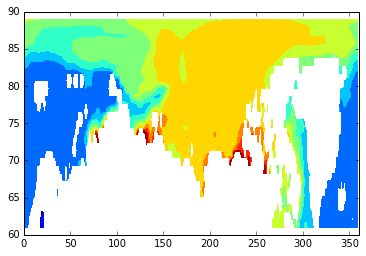

In [60]:
plt.contourf(Balon, Balat, Ba[-1, :, :], np.arange(35, 95, 5))

In [61]:
save_var = {'Balon': Balon, 'Balat': Balat, 'Ba': Ba}
scipy.io.savemat('_data/Temp/Ba.mat', mdict=save_var)

In [73]:
MAT = scipy.io.loadmat('_data/Temp/SVD_Result.mat')

EBa = MAT['EBa'][:]
EU = MAT['EU'][:]
EV = MAT['EV'][:]
expvar = MAT['expvar'][:]

PCBa = MAT['PCBa'][:]
PCWind = MAT['PCWind'][:]

In [74]:
expvar

array([[ 95.8,   3. ,   0.5,   0.5]])

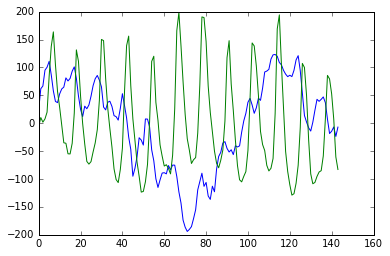

In [71]:
plt.plot(PCBa[0:2, :].T)

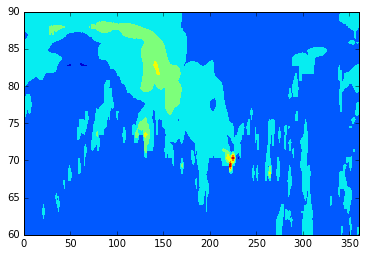

In [79]:
plt.contourf(Balon, Balat, EBa[0, :, :])

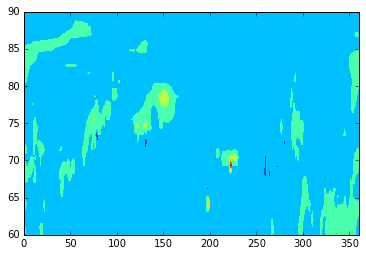

In [80]:
plt.contourf(Balon, Balat, EBa[1, :, :])